In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
file_dir = Path(r"C:\Users\user\Desktop\div\data\files")
cars_csv_path = file_dir / "car-sales-extended-missing-data.csv"
housing_csv_path = file_dir / "housing.csv"

In [5]:
df = pd.read_csv(cars_csv_path)
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


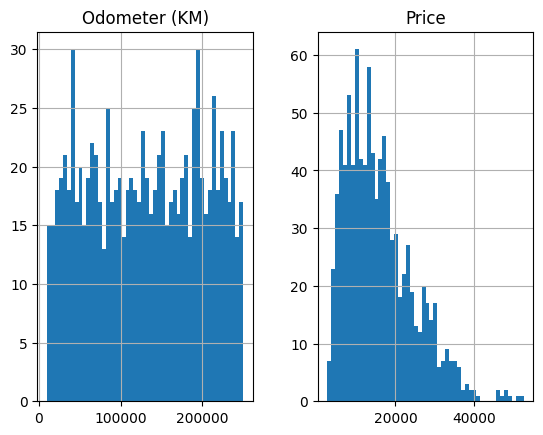

In [6]:
# df.select_dtypes(include='number').hist()
cols_num = ['Odometer (KM)', 'Price']
df[cols_num].hist(bins=50)
plt.show()

In [7]:
# from sklearn.ensemble import IsolationForest
# iso_f = IsolationForest(n_estimators=200, contamination=0.01)
# pred = iso_f.fit_predict(df[['Price']])
# outliers_mask = pred == -1

# plt.hist(df.loc[~outliers_mask, 'Price'], bins=50, color='b')
# plt.hist(df.loc[outliers_mask, 'Price'], bins=50, color='r')
# plt.show()

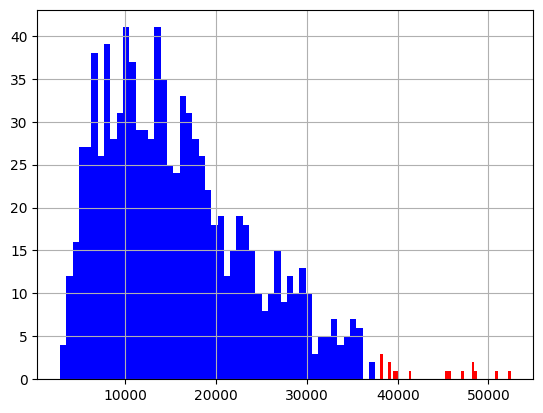

In [8]:
# m = df['Price'].median()
q1, m, q3 = df['Price'].quantile([0.25,0.5, 0.75])

iqr = np.abs(q1 - q3)
lower_limit = q1 - 1.5*iqr 
upper_limit = q3 + 1.5*iqr 

upper_outlier = df['Price'] > upper_limit
lower_outlier = df['Price'] < lower_limit

outlier_mask = upper_outlier | lower_outlier
df.loc[outlier_mask, 'Price'].hist(bins=50, color='red')
df.loc[~outlier_mask, 'Price'].hist(bins=50, color='blue')
plt.show()

In [9]:
df2 = df.loc[~outlier_mask]
df2

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [10]:
df2.info()

<class 'pandas.DataFrame'>
Index: 984 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           936 non-null    str    
 1   Colour         935 non-null    str    
 2   Odometer (KM)  935 non-null    float64
 3   Doors          935 non-null    float64
 4   Price          934 non-null    float64
dtypes: float64(3), str(2)
memory usage: 46.1 KB


In [11]:
num_cols = ['Odometer (KM)', 'Price']
cat_cols = ['Make', 'Colour', 'Doors']

from sklearn.impute import SimpleImputer

ss_num = SimpleImputer(strategy ='median')
output_num = ss_num.fit_transform(df2[num_cols])

ss_cat = SimpleImputer(strategy='most_frequent')
output_cat = ss_cat.fit_transform(df2[cat_cols])

In [12]:
df2.loc[:, num_cols] = output_num
df2.loc[:, cat_cols] = output_cat
df2.info()

<class 'pandas.DataFrame'>
Index: 984 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           984 non-null    str    
 1   Colour         984 non-null    str    
 2   Odometer (KM)  984 non-null    float64
 3   Doors          984 non-null    float64
 4   Price          984 non-null    float64
dtypes: float64(3), str(2)
memory usage: 46.1 KB


In [13]:
df2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
output = ord_enc.fit_transform(df2[['Make']])
# np.unique_counts(output)
# ord_enc.inverse_transform(output)
output

array([[1.],
       [0.],
       [1.],
       [3.],
       [2.],
       [1.],
       [3.],
       [1.],
       [3.],
       [1.],
       [2.],
       [2.],
       [2.],
       [3.],
       [1.],
       [3.],
       [3.],
       [0.],
       [2.],
       [2.],
       [3.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [2.],
       [3.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [0.],
       [3.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [3.],
       [0.],
       [3.],
       [3.],
       [3.],
       [0.],
       [2.],
       [3.],
       [1.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],

In [15]:
pd.DataFrame(output, columns=ord_enc.get_feature_names_out())

,Make
0,1.0
1,0.0
2,1.0
3,3.0
4,2.0
...,...
979,3.0
980,3.0
981,2.0
982,1.0


In [16]:
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(sparse_output=False)
output_onehot = onehot_enc.fit_transform(df2[['Make']])
output_onehot

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], shape=(984, 4))

In [17]:
pd.DataFrame(output_onehot, columns=onehot_enc.get_feature_names_out())

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
979,0.0,0.0,0.0,1.0
980,0.0,0.0,0.0,1.0
981,0.0,0.0,1.0,0.0
982,0.0,1.0,0.0,0.0


In [31]:
cat_cols = ['Make', 'Colour', 'Doors']


In [ ]:
onehot_enc = OneHotEncoder(sparse_output=False)
outp = onehot_enc.fit_transform(df2.loc[:, cat_cols])
pd.DataFrame(outp, columns=onehot_enc.get_feature_names_out())

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3.0,Doors_4.0,Doors_5.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
980,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
981,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df2.groupby(by=['Make'])['Price'].transform('mean')

0      14601.929795
1      23133.658537
2      14601.929795
3      15417.663934
4      13686.797814
           ...     
995    15417.663934
996    15417.663934
997    13686.797814
998    14601.929795
999    15417.663934
Name: Make, Length: 984, dtype: float64

In [56]:
from sklearn.preprocessing import TargetEncoder
t_enc = TargetEncoder(smooth=0, cv=2)
outp = t_enc.fit_transform(df2[['Make']], df2['Price'])
np.unique(outp)
# pd.DataFrame(outp, columns=t_enc.get_feature_names_out())

array([12543.74193548, 14531.44256757, 14674.375     , 14867.95555556,
       15331.83105023, 15508.03605769, 23016.27659574, 23291.28571429])

In [57]:
df3 = pd.read_csv(housing_csv_path)
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


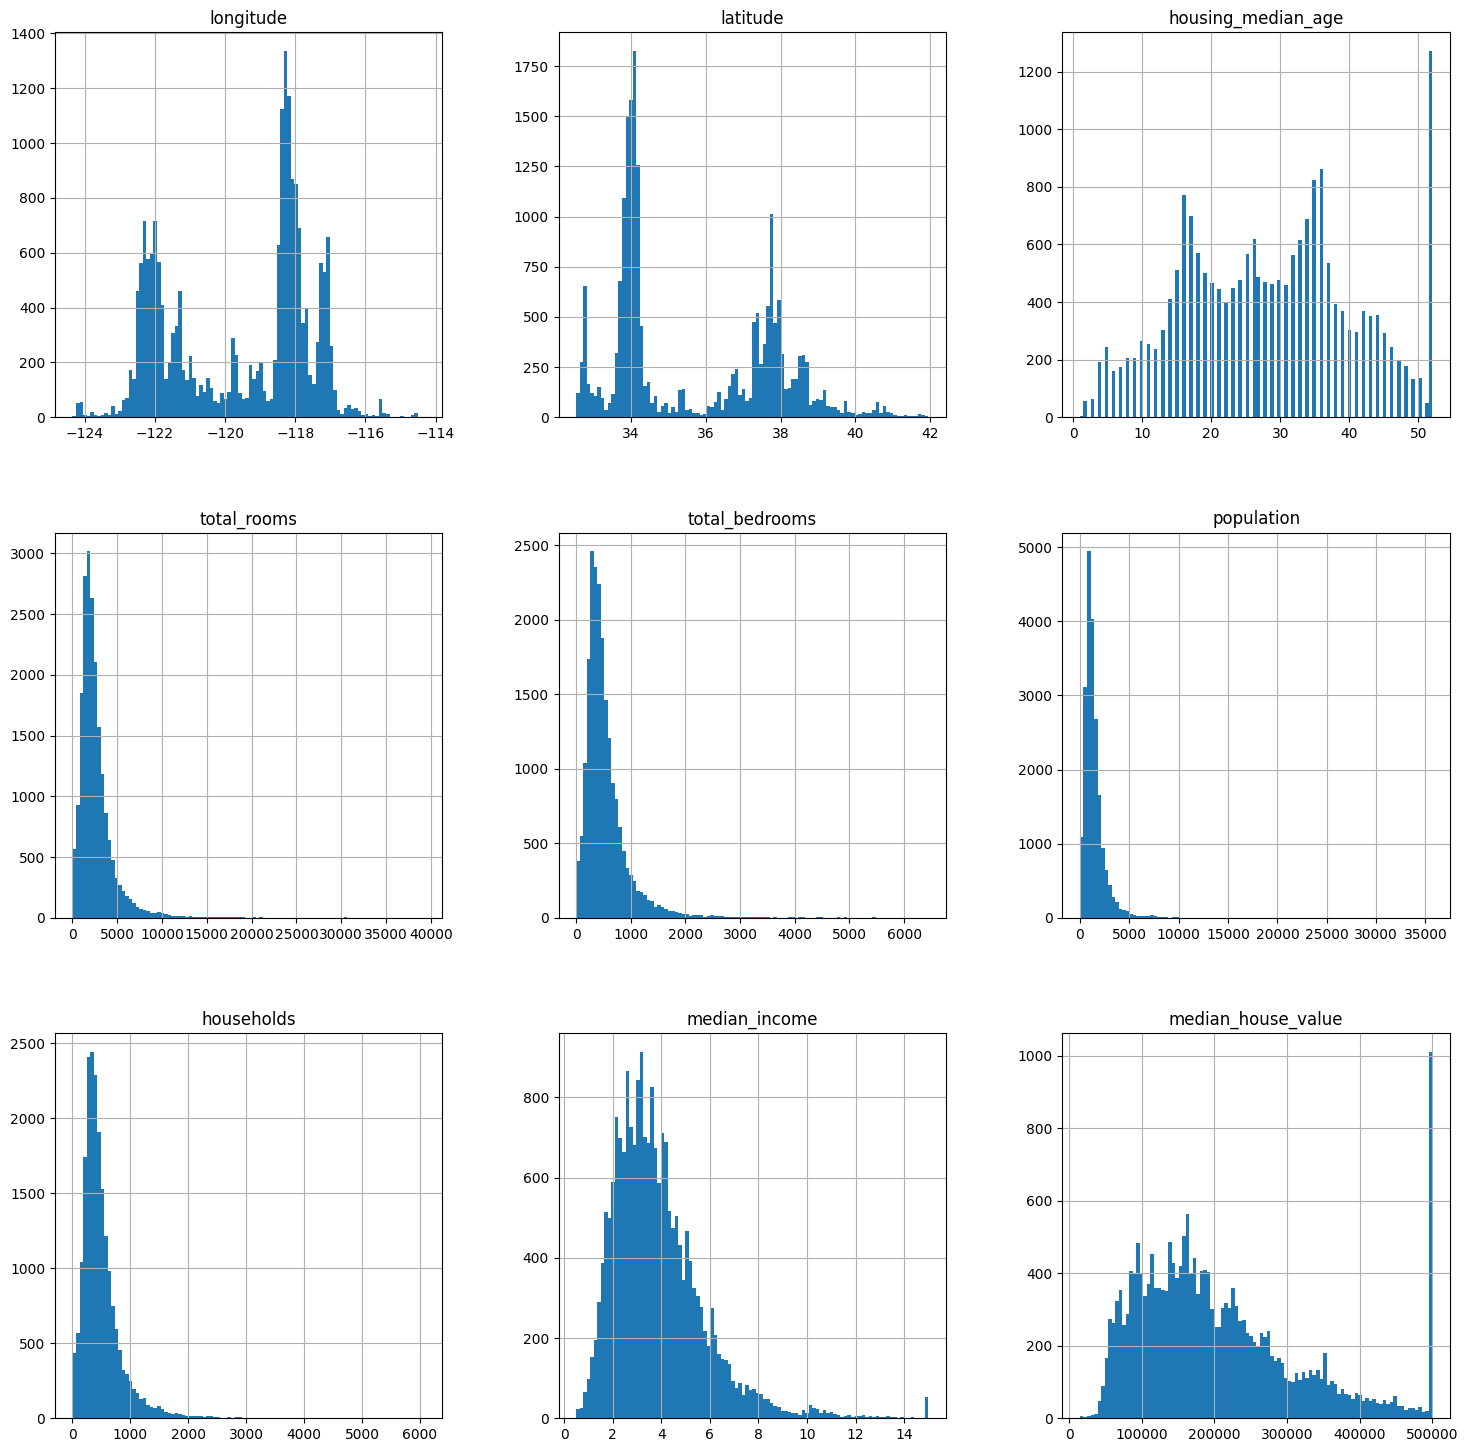

In [62]:
import matplotlib.pyplot as plt

df3_num = df3.select_dtypes('number')
df3_num.hist(figsize=(18,18), bins=100)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14804\1640648173.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


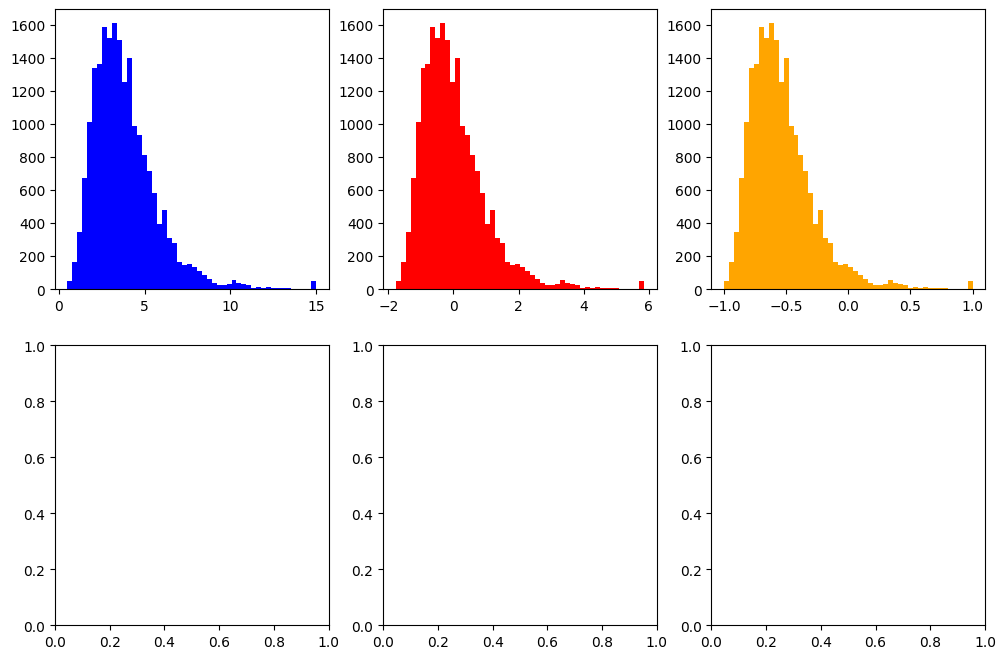

In [88]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
output_ss = ss.fit_transform(df3[['median_income']])
mm = MinMaxScaler(feature_range=(-1,1))
output_mm = mm.fit_transform(df3[['median_income']])

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
axs[0,0].hist(df3['median_income'], bins=50, color='blue')
axs[0,1].hist(output_ss, bins=50, color='red')
axs[0,2].hist(output_mm, bins=50, color='orange')
fig.show()

In [79]:
yashlar = np.array([19,21,18,17,33])
m = np.mean(yashlar)
s = np.std(yashlar)
np.std((yashlar - m) / s)

np.float64(0.9999999999999998)

In [83]:
(yashlar - 17)/16

array([0.125 , 0.25  , 0.0625, 0.    , 1.    ])